<a href="https://colab.research.google.com/github/sharlynmuturi/Pytorch-Tutorial/blob/main/linear_logistic_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing.csv')

# Linear Regression

In [57]:
time_studied = np.array([20, 50, 32, 65, 23, 43, 10, 5, 22, 35, 29, 5, 56]).reshape(-1, 1)
scores = np.array([56, 83, 47, 93, 47, 82, 45, 23, 55, 67, 57, 4, 89]).reshape(-1, 1)

data = pd.DataFrame({
    'time_studied': time_studied.flatten(),
    'scores': scores.flatten()
})

print(data)

    time_studied  scores
0             20      56
1             50      83
2             32      47
3             65      93
4             23      47
5             43      82
6             10      45
7              5      23
8             22      55
9             35      67
10            29      57
11             5       4
12            56      89


In [51]:
# Mean Squared Error or the loss function
# Error starts at 0, add all individual errors to that, then divide by amount of data points
# y=mx+b
def loss_function(m, b, datapoints):
  total_error = 0
  for i in range(0, len(datapoints)):
    x = datapoints.iloc[i].time_studied
    y = datapoints.iloc[i].scores
    total_error += (y - (m * x + b)) ** 2
  total_error / float(len(datapoints))

  # We wont use this function cause its already included in the gradient descent
  # We are interested in minimizing it

In [52]:
def gradient_descent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i].time_studied
    y = points.iloc[i].scores

    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * L
  b = b_now - b_gradient * L

  return m, b


In [53]:
m = 0
b = 0
L = 0.001
epochs = 100

for i in range(epochs):
  if i % 50 == 0:
    print(f'Epoch: {i}')
  m, b = gradient_descent(m, b, data, L)

print(m, b)

Epoch: 0
Epoch: 50
-2.4420056927241247e+18 -5.896207416343131e+16


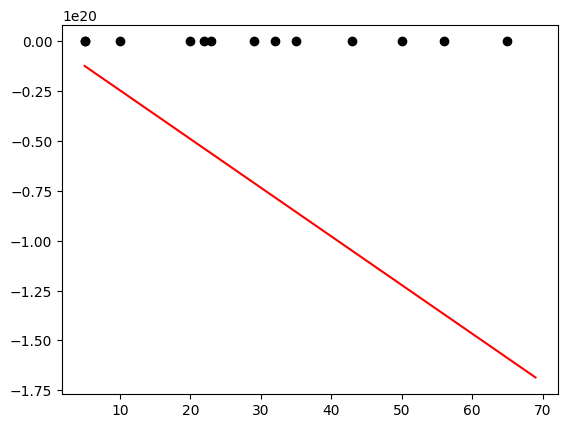

In [55]:
plt.scatter(data.time_studied, data.scores, color='black')
plt.plot(list(range(5, 70)), [m * x + b for x in range(5, 70)], color='red')

# Logistic Regression

In [34]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

In [35]:
def calculate_gradient(theta, X, y):
  m = y.size # no o instances
  return (X.T @ (sigmoid(X @ theta) - y) / m)

In [36]:
def gradient_descent(X, y, alpha=0.1, num_iter=100, tol=1e-7):
  X_b = np.c_[np.ones((X.shape[0], 1)), X]
  theta = np.zeros(X_b.shape[1])

  for i in range(num_iter):
    grad = calculate_gradient(theta, X_b, y)
    theta -= alpha * grad

    if np.linalg.norm(grad) < tol:
      break

  return theta

In [37]:
def predict_proba(X, theta):
  X_b = np.c_[np.ones((X.shape[0], 1)), X]
  return sigmoid( X_b @ theta)

In [38]:
def predict(X, theta, threshold=0.5):
  return (predict_proba(X, theta) >= threshold).astype(int)

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
theta_hat = gradient_descent(X_train_scaled, y_train)

y_pred_train = predict(X_train_scaled, theta_hat)
y_pred_test = predict(X_test_scaled, theta_hat)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Train accuracy: 0.9824175824175824
Test accuracy: 0.9824561403508771
